In [1]:
# import the necessary libraries

import numpy as np
import pandas as pd
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# read the data
df = pd.read_csv('labels.csv')

In [3]:
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
df.describe().T

,count,unique,top,freq
id,10222,10222,8436be99589db6a99cfac1b894421ea6,1
breed,10222,120,scottish_deerhound,126


In [5]:
breeds=df['breed'].unique()
breeds

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [6]:
print(len(breeds))

120


In [7]:
#images per breed
each_label = df.groupby("breed").count()
each_label = each_label.rename(columns = {"id" : "count"})
each_label

,count
breed,
affenpinscher,80
afghan_hound,116
african_hunting_dog,86
airedale,107
american_staffordshire_terrier,74
...,...
welsh_springer_spaniel,79
west_highland_white_terrier,81
whippet,95


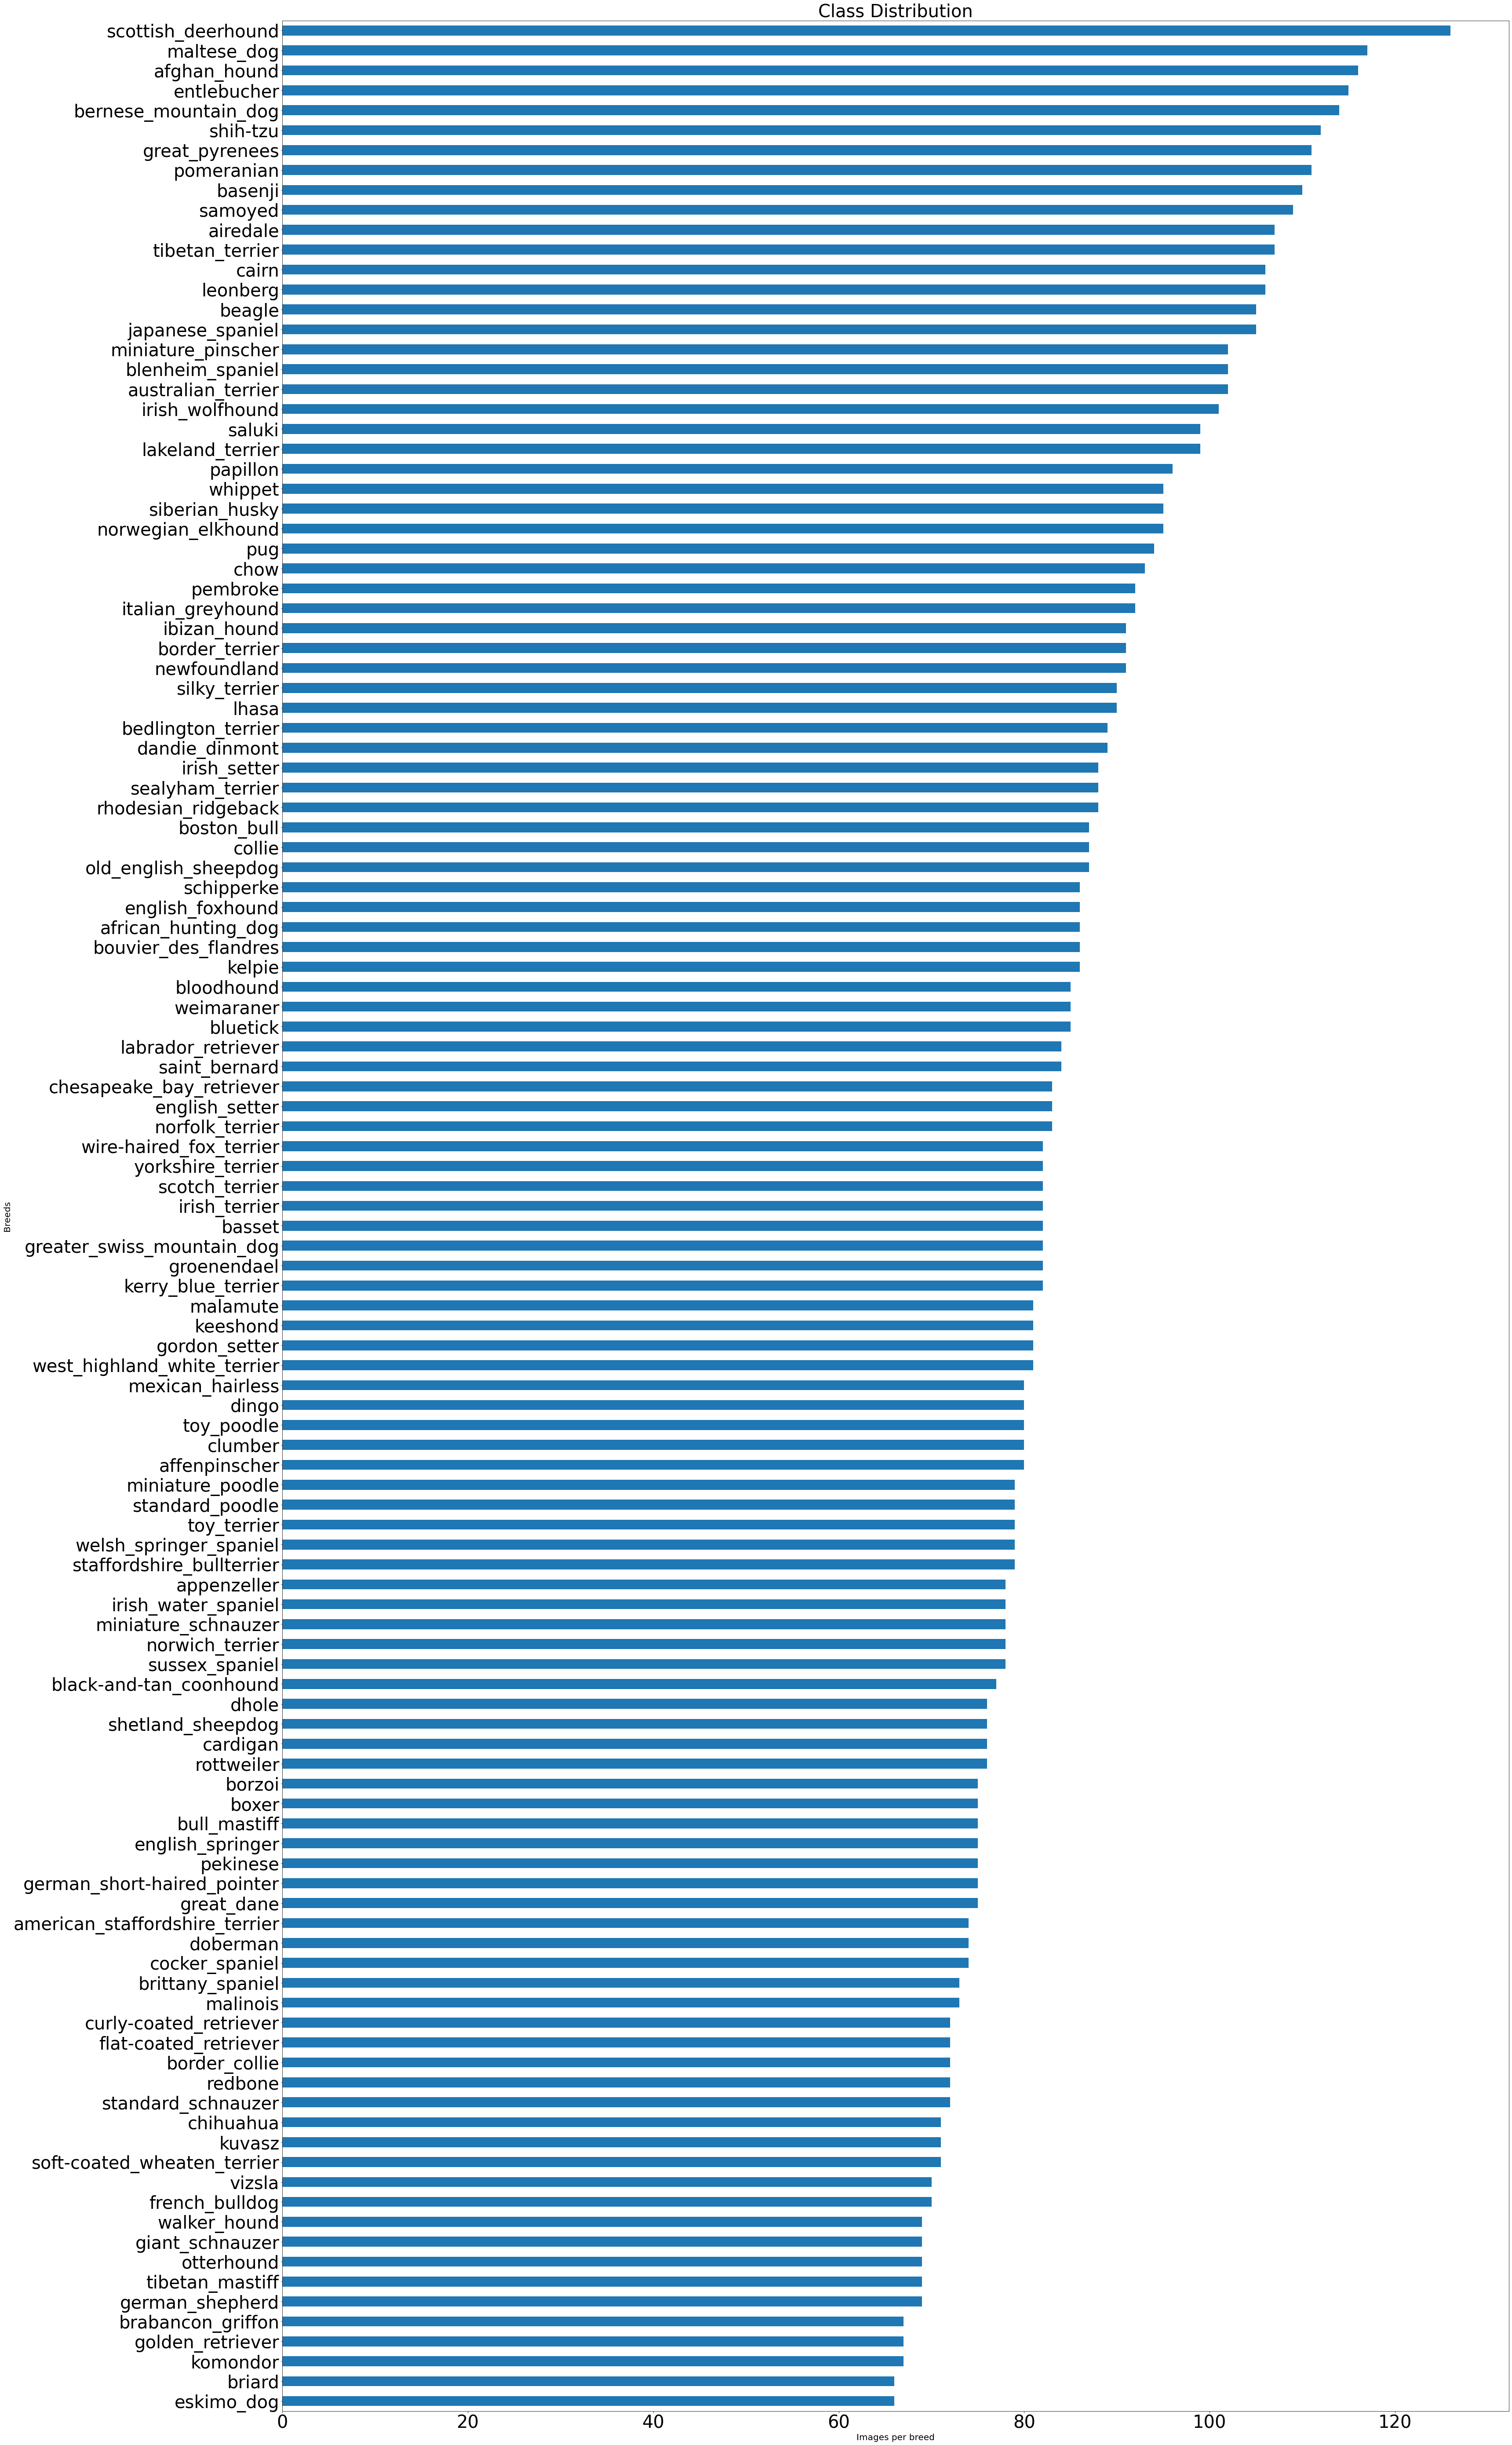

In [8]:
# images per breed graph
figure=pd.value_counts(df['breed'],ascending=True).plot(kind='barh',
                                                       fontsize="40",
                                                       title="Class Distribution",
                                                       figsize=(50,100))
figure.set(xlabel="Images per breed", ylabel="Breeds")
figure.xaxis.label.set_size(20)
figure.yaxis.label.set_size(20)
figure.title.set_size(40)

In [9]:
import zipfile
with zipfile.ZipFile("train.zip","r") as zip_ref:
    zip_ref.extractall("train_target")

Text(0.5, 1.0, 'boston_bull')

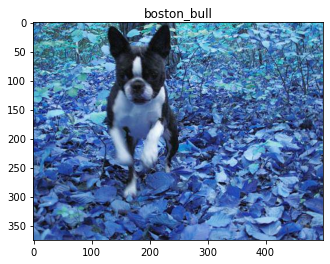

In [10]:
row = df.iloc[0]
img = cv2.imread("train_target/"+row.id+".jpg")
plt.imshow(img)
plt.title(row.breed)

In [11]:
df["filename"] = df['id'] + ".jpg"
df.head()

,id,breed,filename
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,0021f9ceb3235effd7fcde7f7538ed62.jpg


In [12]:
# width,height,channel
print(img.shape)

(375, 500, 3)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(1, 1), activation="relu", input_shape=(375, 500, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, kernel_size=(1, 1), activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=(1, 1), activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(120, activation="softmax"))

#compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 375, 500, 32)      128       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 187, 250, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 187, 250, 64)      2112      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 93, 125, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 93, 125, 128)      8320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 46, 62, 128)      0

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_df, valid_df = train_test_split(df, test_size=0.15, random_state=123)

In [17]:
train_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = train_gen.flow_from_dataframe(
    train_df,
    directory="train_target", 
    x_col="filename",
    y_col="breed",
    target_size=(375, 500),
    class_mode="categorical"
)

Found 8688 validated image filenames belonging to 120 classes.


In [18]:
valid_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
valid_generator = train_gen.flow_from_dataframe(
    valid_df,
    directory="train_target", 
    x_col="filename",
    y_col="breed",
    target_size=(375, 500),
    class_mode="categorical"
)

Found 1534 validated image filenames belonging to 120 classes.


In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [20]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(patience=2, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
model.fit(train_generator,
          validation_data=valid_generator,
          epochs=50, 
          callbacks = [earlystop, learning_rate_reduction])

Epoch 1/50
  1/272 [..............................] - ETA: 3:48:57 - loss: 4.7897 - accuracy: 0.0312

In [ ]:
#evaluate the model
scores = model.evaluate_generator(valid_generator)
print("Loss = ", scores[0])
print("Accuracy = ", scores[1])

In [ ]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
#save the model
model.save_weights("model.h5")

In [ ]:
# Splitting the data set into training and testing data sets
X_train, X_test, Y_train, Y_test = train_test_split(df, test_size = 0.1, random_state =123)

#test the model
Y_pred = model.predict(x_col)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')